In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data_file =r"/kaggle/input/hipparcos-star-catalog/hipparcos-voidmain.csv"
df = pd.read_csv(data_file) 

/kaggle/input/hipparcos-star-catalog/hipparcos-voidmain.csv


In [2]:

df = df.dropna(subset=["B-V", "Vmag", "Plx"])
df["Temperature (K)"] = 4600 * ((1 / (0.92 * df["B-V"] + 1.7)) + (1 / (0.92 * df["B-V"] + 0.62)))
df["M"] = -1 * (df["Vmag"] - 5 * (np.log10(df["Plx"]) - 1))

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
def classify_star_type(sptype):
    if isinstance(sptype, str):
        if "O" in sptype:
            return "O"
        elif "B" in sptype:
            return "B"
        elif "A" in sptype:
            return "A"
        elif "F" in sptype:
            return "F"
        elif "G" in sptype:
            return "G"
        elif "K" in sptype:
            return "K"
        elif "M" in sptype:
            return "M"
    return "Others"

df["Star Type"] = df["SpType"].apply(classify_star_type)

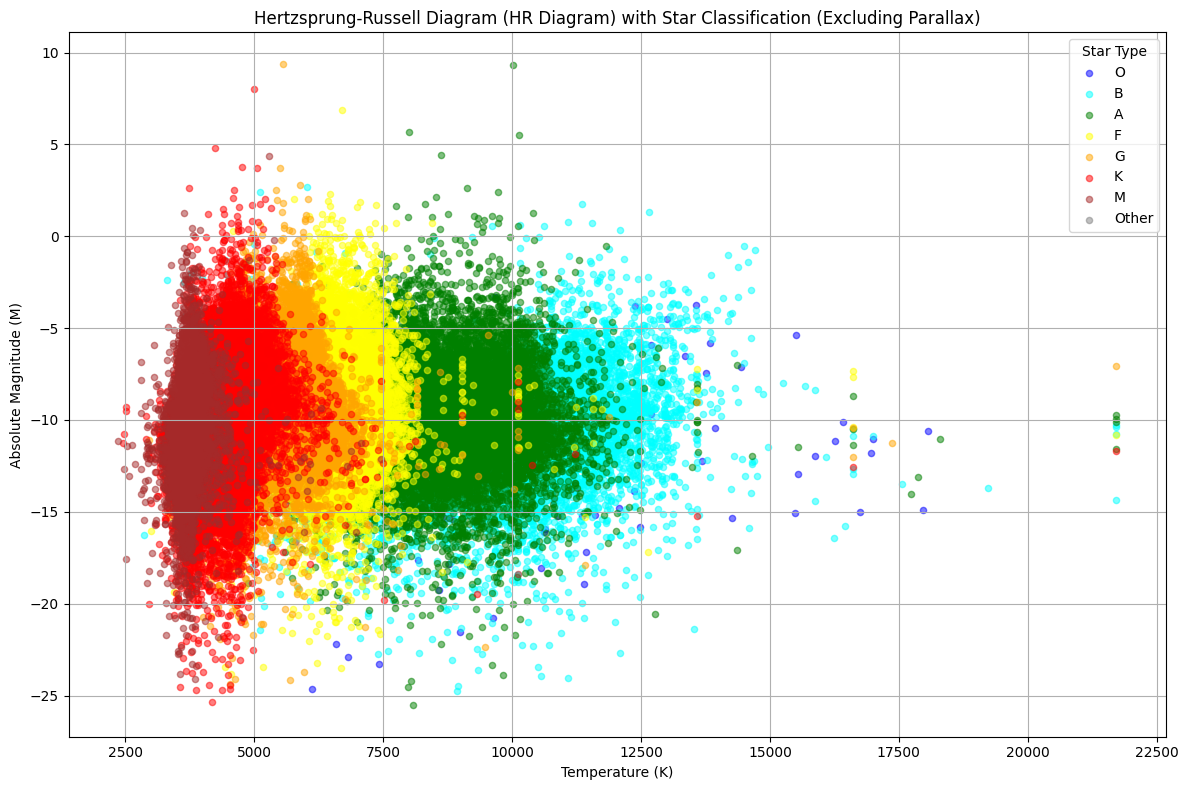

In [4]:
plt.figure(figsize=(12, 8))
x = df["Temperature (K)"]
y = df["M"]

star_colors = {"O": "blue", "B": "cyan", "A": "green", "F": "yellow", "G": "orange", "K": "red", "M": "brown", "Other": "gray"}

for star_type, color in star_colors.items():
    filtered_df = df[df["Star Type"] == star_type]
    plt.scatter(filtered_df["Temperature (K)"], filtered_df["M"], label=star_type, c=color, s=20, alpha=0.5)

plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Hertzsprung-Russell Diagram (HR Diagram) with Star Classification (Excluding Parallax)')
plt.legend(title='Star Type')
plt.grid(True)
plt.tight_layout()


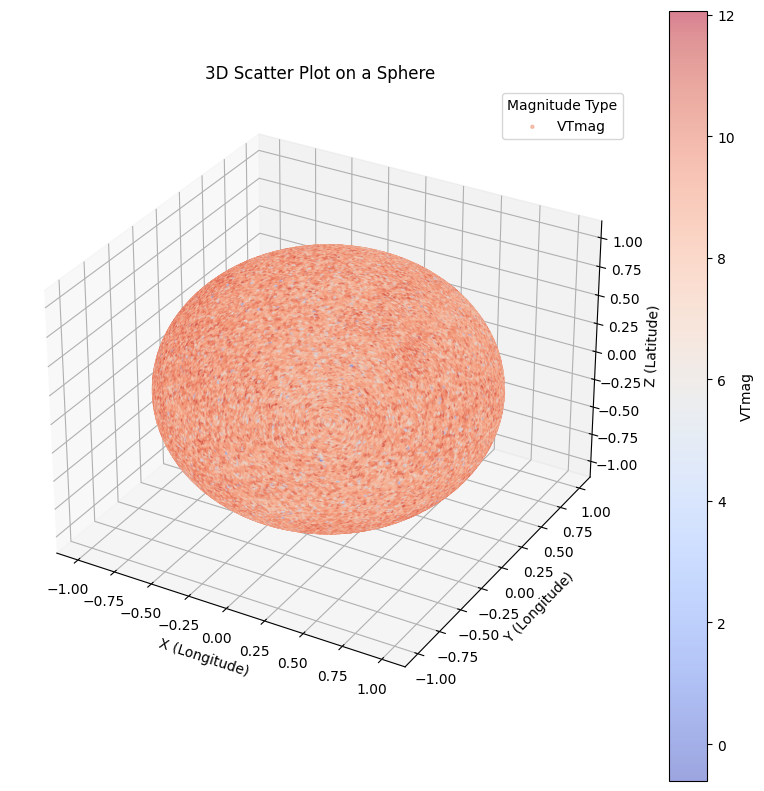

In [5]:
hip_json = df[['RAdeg', 'DEdeg', 'VTmag', 'BTmag']]
hip_json = hip_json.dropna(subset=['RAdeg', 'DEdeg'])
hip_json = hip_json.dropna(subset=['VTmag'])

hip_json = hip_json.rename(columns={'DEdeg': 'latitude', 'RAdeg': 'longitude'})

hip_json.reset_index(drop=True, inplace=True)
latitude = np.radians(90 - hip_json['latitude'])
longitude = np.radians(hip_json['longitude'])
radius = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = radius * np.sin(latitude) * np.cos(longitude)
y = radius * np.sin(latitude) * np.sin(longitude)
z = radius * np.cos(latitude)


c2 = ax.scatter(x, y, z, c=hip_json['VTmag'], cmap='coolwarm', s=5, alpha=0.5, label='VTmag')

ax.set_xlabel('X (Longitude)')
ax.set_ylabel('Y (Longitude)')
ax.set_zlabel('Z (Latitude)')
ax.set_title('3D Scatter Plot on a Sphere')


cbar2 = fig.colorbar(c2)
cbar2.set_label('VTmag')

plt.legend(title='Magnitude Type')
plt.show()